In [1]:
#import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from tensorflow.keras import layers, callbacks
from tensorflow import keras

In [2]:
#read csv file
df = pd.read_csv('walmart_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
#Check dataset
print("The Shape:",df.shape)
print("The NULL values:\n",df.isnull().sum())
print("Number of duplicated values",df.duplicated().sum())

The Shape: (421570, 16)
The NULL values:
 Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64
Number of duplicated values 0


In [4]:
# drop outliers
q1 = df['Weekly_Sales'].quantile(0.25)
q3 = df['Weekly_Sales'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
df = df[(df['Weekly_Sales'] >= lower) & (df['Weekly_Sales'] <= upper)]

In [5]:
#descriptive statistics
df.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000,386049.000000
mean,22.418351,0.070051,42.902909,10544.403242,60.062128,3.361214,2529.486844,856.411102,434.517573,1050.659744,1615.266614,171.282755,7.971957,2.386391,133748.441149
std,12.791236,0.255233,29.604673,11327.026575,18.493405,0.459029,5962.092832,4951.959590,5258.890576,3823.303696,4106.270281,39.170721,1.876819,0.668620,60976.982207
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,1755.830000,46.660000,2.932000,0.000000,0.000000,0.000000,0.000000,0.000000,132.106200,6.885000,2.000000,93188.000000
50%,22.000000,0.000000,35.000000,6373.100000,62.070000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.431557,7.866000,2.000000,128107.000000
75%,33.000000,0.000000,71.000000,15802.090000,74.250000,3.738000,2683.990000,1.750000,4.090000,407.170000,2096.860000,212.576205,8.595000,3.000000,202307.000000
max,45.000000,1.000000,99.000000,47393.430000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [6]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386049 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         386049 non-null  int64  
 1   Date          386049 non-null  object 
 2   IsHoliday     386049 non-null  int64  
 3   Dept          386049 non-null  float64
 4   Weekly_Sales  386049 non-null  float64
 5   Temperature   386049 non-null  float64
 6   Fuel_Price    386049 non-null  float64
 7   MarkDown1     386049 non-null  float64
 8   MarkDown2     386049 non-null  float64
 9   MarkDown3     386049 non-null  float64
 10  MarkDown4     386049 non-null  float64
 11  MarkDown5     386049 non-null  float64
 12  CPI           386049 non-null  float64
 13  Unemployment  386049 non-null  float64
 14  Type          386049 non-null  int64  
 15  Size          386049 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 50.1+ MB


In [7]:
# apply Label encoder
df_categorical = df.select_dtypes(include='object')
encoder = LabelEncoder()
df_categorical = df_categorical.apply(encoder.fit_transform)
df.drop(df_categorical.columns, axis=1, inplace=True)
df = pd.concat([df, df_categorical], axis=1)

In [8]:
# Define features and target variable
features = [
    'Store', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Type', 'Size',
    'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
]

In [9]:
# keep only positive Weekly Sales 
df = df[df['Weekly_Sales'] > 0]

In [10]:
# Define features and target variable
X= df.drop('Weekly_Sales',axis=1)
y = np.log1p(df['Weekly_Sales'])

In [ ]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# build network model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

c:\Users\رناد\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [15]:
# apply early stopping 
early_stop = callbacks.EarlyStopping(
    patience=15,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [16]:
# train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=1024,
    callbacks=[early_stop],
)

Epoch 1/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 53.2515 - mae: 6.8755 - val_loss: 3.1374 - val_mae: 1.3966
Epoch 2/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8984 - mae: 1.2649 - val_loss: 2.5189 - val_mae: 1.1534
Epoch 3/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.6309 - mae: 1.1732 - val_loss: 2.4296 - val_mae: 1.1144
Epoch 4/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.5380 - mae: 1.1454 - val_loss: 2.3883 - val_mae: 1.1128
Epoch 5/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.4781 - mae: 1.1314 - val_loss: 2.3514 - val_mae: 1.0964
Epoch 6/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.4750 - mae: 1.1298 - val_loss: 2.3097 - val_mae: 1.0739
Epoch 7/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.4241 - mae: 1.1184 - val_loss: 2.3152 - val_mae: 1.0733
Epoch 8/300
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3825 - mae: 1.1084 - val_loss: 2.2849 - val_mae: 1.0859
Epoch 9/300
211/211 ━━━━━━━━━━━━━━━━━━━

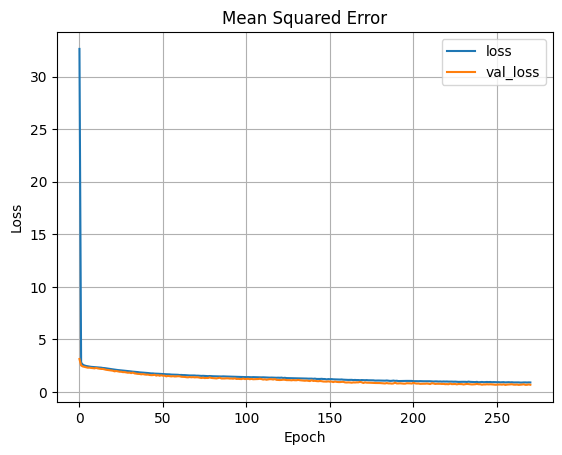

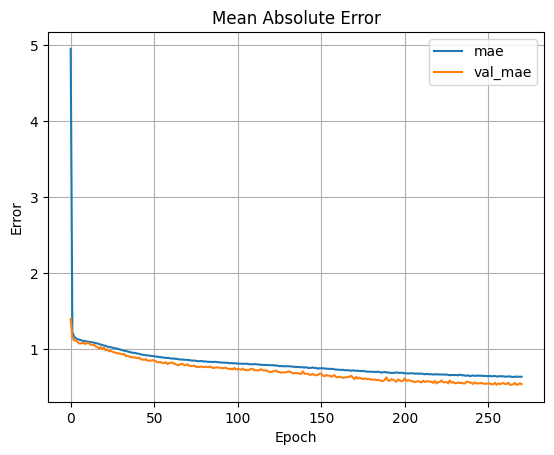

In [17]:
#compare the model loss against the actual val_loss
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Mean Squared Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#compare the model mae against the actual val mae
history_df[['mae', 'val_mae']].plot(title="Mean Absolute Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [18]:
# Calculate performance metrics
y_pred = model.predict(X_test_scaled).flatten()
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

rmse = metrics.root_mean_squared_error(y_test_actual, y_pred_actual)
r2 = metrics.r2_score(y_test_actual, y_pred_actual)
mae = metrics.mean_absolute_error(y_test_actual, y_pred_actual)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

3607/3607 ━━━━━━━━━━━━━━━━━━━━ 3s 915us/step
MAE: 3866.58
RMSE: 6617.99
R² Score: 0.6569


In [19]:
# Calculate performance metrics with Log
y_pred = model.predict(X_test_scaled)
rmse = metrics.root_mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

3607/3607 ━━━━━━━━━━━━━━━━━━━━ 3s 912us/step
MAE: 0.53
RMSE: 0.82
R² Score: 0.8204


In [20]:
# test evaluate
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test RMSE: {np.sqrt(test_loss):.4f}")
print(f"Test MAE: {test_mae:.4f}")

3607/3607 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6740 - mae: 0.5310
Test RMSE: 0.8178
Test MAE: 0.5297
